In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


### M2 EDA


📌 DF2 RAW HEAD


,통계표,계정항목,단위,변환,2003/10,2003/11,2003/12,2004/01,2004/02,2004/03,...,2025/02,2025/03,2025/04,2025/05,2025/06,2025/07,2025/08,2025/09,2025/10,2025/11
0,"1.1.3.1.1. M2 상품별 구성내역(평잔, 계절조정계열)","M2(평잔,계절조정계열)",십억원,원자료,"830,331.2","843,054.4","849,773.2","854,520.6","860,954.0","868,066.8",...,"3,926,523.6","3,915,483.4","3,929,779.0","3,957,728.3","3,979,473.3","3,997,486.9","4,040,694.6","4,057,516.7","4,059,450.7","4,057,549.3"
1,"1.1.3.1.1. M2 상품별 구성내역(평잔, 계절조정계열)",현금통화,십억원,원자료,"17,421.9","17,628.1","16,981.0","17,927.0","16,377.8","16,625.6",...,"184,423.4","184,837.7","185,549.5","186,633.5","188,159.7","189,662.3","191,542.2","193,756.8","194,755.0","198,001.6"
2,"1.1.3.1.1. M2 상품별 구성내역(평잔, 계절조정계열)",요구불예금,십억원,원자료,"54,936.6","56,310.7","56,387.2","56,118.2","56,299.1","58,231.1",...,"380,647.8","382,326.5","382,893.6","380,941.8","381,536.1","388,672.6","392,552.5","397,242.5","399,650.2","397,335.6"
3,"1.1.3.1.1. M2 상품별 구성내역(평잔, 계절조정계열)",수시입출식저축성예금,십억원,원자료,"179,369.0","185,853.8","187,110.4","188,736.4","188,277.0","187,981.9",...,"704,311.6","701,125.4","700,175.3","705,524.4","707,358.5","713,173.2","722,292.4","726,624.3","736,198.7","737,090.5"
4,"1.1.3.1.1. M2 상품별 구성내역(평잔, 계절조정계열)",MMF 지분,십억원,원자료,"47,331.3","42,106.3","40,020.0","42,775.8","46,495.3","48,872.7",...,"156,790.1","152,491.6","157,167.7","163,465.9","171,090.1","168,797.0","175,874.5","177,002.2","172,162.0","171,854.4"



📌 DATE 변환 확인
NaT 개수: 0

📌 DF2 TRANSFORMED HEAD


계정항목,date,"M2(평잔,계절조정계열)",현금통화,요구불예금,수시입출식저축성예금,MMF 지분,만기2년미만정기예적금,시장형상품 1),만기2년미만금융채,만기2년미만금전신탁,기타 2),"[참고] 구 M2(평잔, 계절조정계열)"
0,2004-01,854520.6,17927.0,56118.2,188736.4,42775.8,394316.5,56517.2,36706.4,28299.1,33123.8,900001.8
1,2004-02,860954.0,16377.8,56299.1,188277.0,46495.3,397519.6,56033.3,38452.3,27060.2,34439.4,907172.8
2,2004-03,868066.8,16625.6,58231.1,187981.9,48872.7,398536.4,55872.1,41117.3,26610.5,34219.1,913480.8
3,2004-04,870908.7,16903.5,57077.1,186149.5,52389.0,396807.9,56565.7,43543.5,25822.2,35650.3,915889.2
4,2004-05,873417.5,16950.2,57079.8,184874.5,52090.7,399134.7,57308.4,45487.6,25550.3,34941.3,923429.4



📌 DF2 SHAPE
(263, 12)

📌 DF2 DTYPES


,dtype
계정항목,
date,period[M]
"M2(평잔,계절조정계열)",float64
현금통화,float64
요구불예금,float64
수시입출식저축성예금,float64
MMF 지분,float64
만기2년미만정기예적금,float64
시장형상품 1),float64
만기2년미만금융채,float64



📌 MISSING VALUES


,missing_count
계정항목,
date,0
"M2(평잔,계절조정계열)",0
현금통화,0
요구불예금,0
수시입출식저축성예금,0
MMF 지분,0
만기2년미만정기예적금,0
시장형상품 1),0
만기2년미만금융채,0



📌 DESCRIBE (NUMERIC)


계정항목,"M2(평잔,계절조정계열)",현금통화,요구불예금,수시입출식저축성예금,MMF 지분,만기2년미만정기예적금,시장형상품 1),만기2년미만금융채,만기2년미만금전신탁,기타 2),"[참고] 구 M2(평잔, 계절조정계열)"
count,2.630000e+02,263.000000,263.000000,263.000000,263.000000,2.630000e+02,263.000000,263.000000,263.000000,263.000000,2.630000e+02
mean,2.156561e+06,78818.941065,191299.771863,424909.747148,86837.597338,9.498683e+05,55441.324715,92750.494297,154690.342205,121944.062357,2.309640e+06
std,9.800635e+05,56502.284520,122893.634520,199309.916668,37230.617271,4.054737e+05,30130.964190,35029.104190,91321.176384,71294.324410,1.017956e+06
min,8.545206e+05,16377.800000,56118.200000,178948.100000,40873.300000,3.943165e+05,20219.500000,36706.400000,22937.200000,28053.800000,9.000018e+05
25%,1.344889e+06,24283.150000,87776.050000,245157.550000,55001.700000,5.971556e+05,32057.350000,64088.950000,61739.600000,59067.100000,1.506564e+06
50%,1.946214e+06,63238.500000,137670.000000,367277.600000,77976.000000,8.914928e+05,46025.600000,91298.900000,172864.300000,117797.800000,2.085332e+06
75%,2.908877e+06,122977.000000,300676.000000,617742.050000,120165.450000,1.186672e+06,68560.050000,107640.600000,240717.400000,174979.100000,3.062045e+06
max,4.059451e+06,198001.600000,432499.300000,791847.300000,177002.200000,1.780052e+06,129109.500000,173256.400000,316929.800000,280922.700000,4.498611e+06



📌 BOXPLOT (Mean / Q1 / Q3)

📊 M2(평잔,계절조정계열)
Mean: 2156560.543
Q1  : 1344888.750
Q3  : 2908877.100


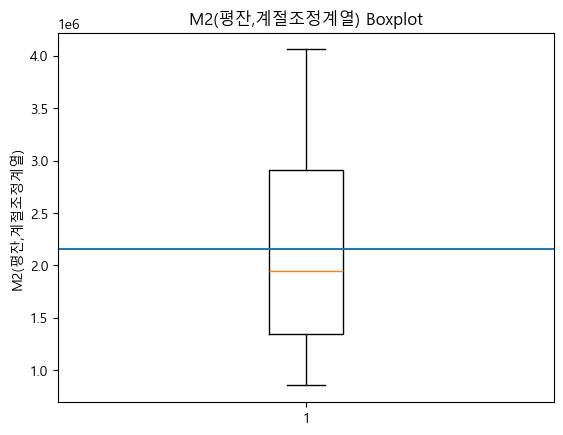


📊   현금통화
Mean: 78818.941
Q1  : 24283.150
Q3  : 122977.000


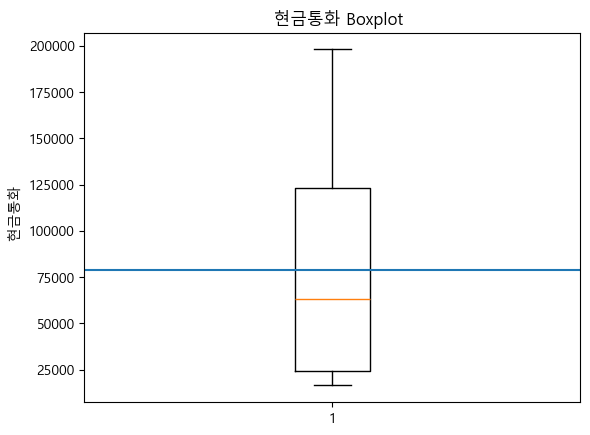


📊   요구불예금
Mean: 191299.772
Q1  : 87776.050
Q3  : 300676.000


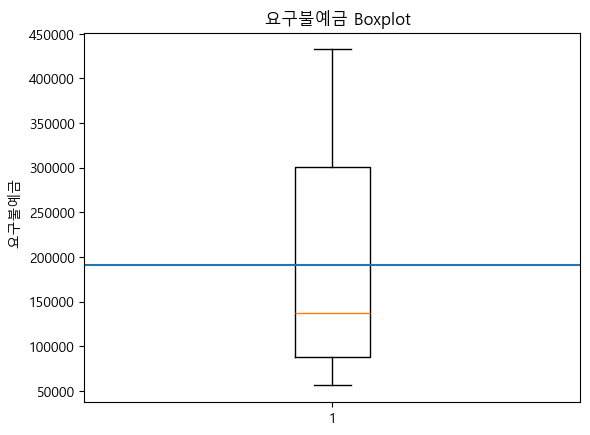


📊   수시입출식저축성예금
Mean: 424909.747
Q1  : 245157.550
Q3  : 617742.050


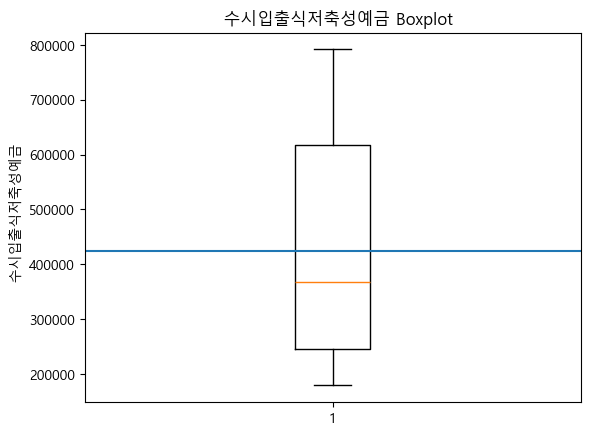


📊   MMF 지분
Mean: 86837.597
Q1  : 55001.700
Q3  : 120165.450


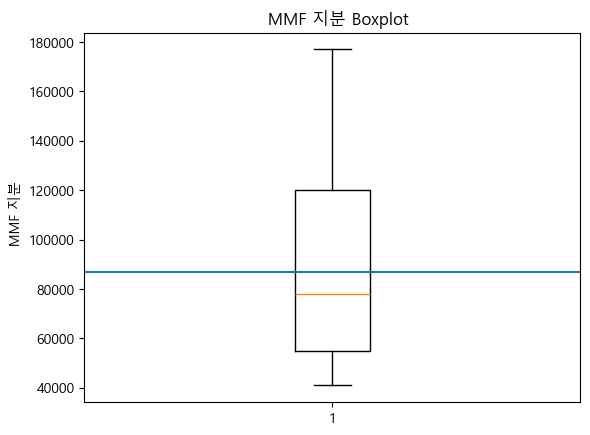


📊   만기2년미만정기예적금
Mean: 949868.260
Q1  : 597155.600
Q3  : 1186672.100


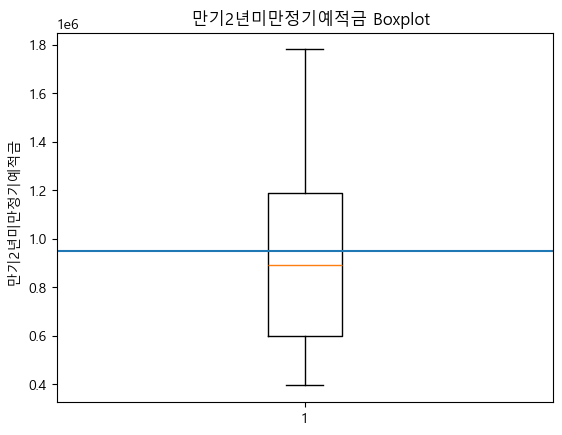


📊   시장형상품 1)
Mean: 55441.325
Q1  : 32057.350
Q3  : 68560.050


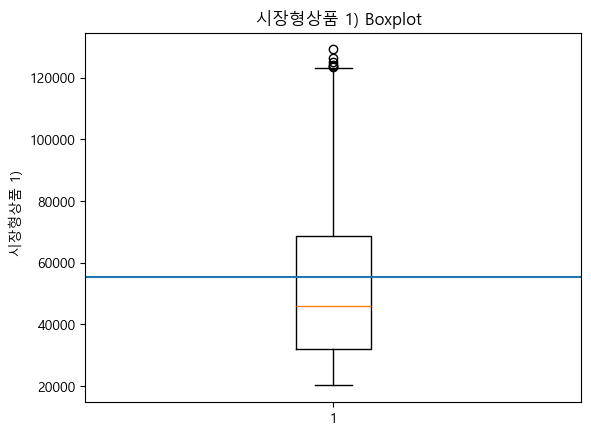


📊   만기2년미만금융채
Mean: 92750.494
Q1  : 64088.950
Q3  : 107640.600


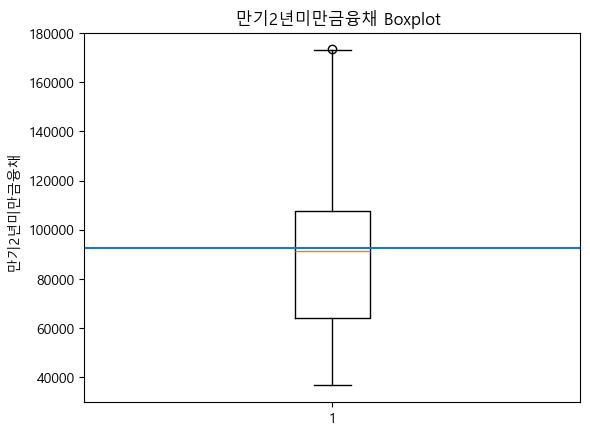


📊   만기2년미만금전신탁
Mean: 154690.342
Q1  : 61739.600
Q3  : 240717.400


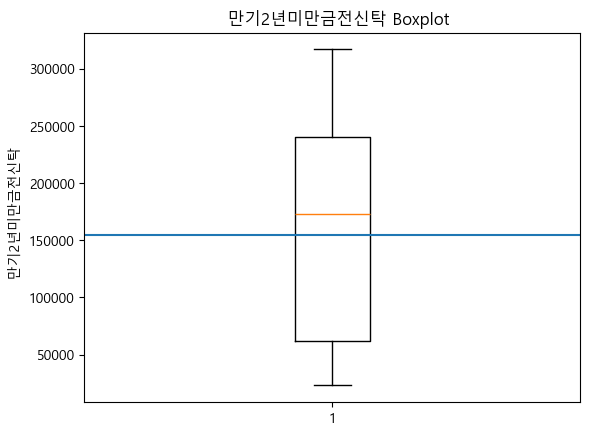


📊   기타 2)
Mean: 121944.062
Q1  : 59067.100
Q3  : 174979.100


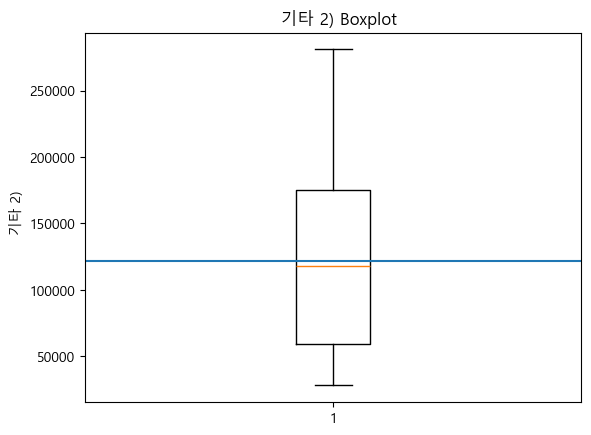


📊   [참고] 구 M2(평잔, 계절조정계열)
Mean: 2309639.828
Q1  : 1506563.800
Q3  : 3062044.550


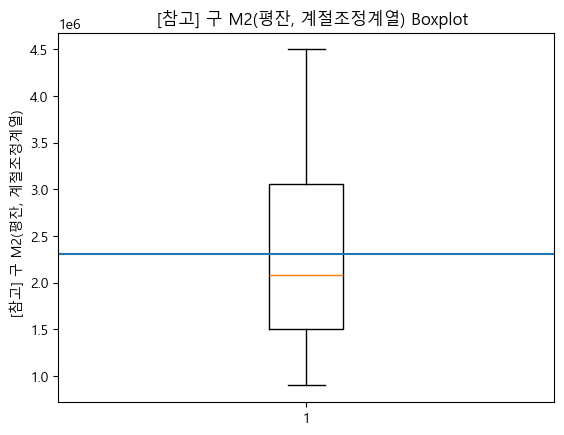

In [9]:
def section(title):
    print("\n" + "="*60)
    print(f"📌 {title}")
    print("="*60)


# =========================
# 1) 로딩 (새 파일)
# =========================
df2_raw = pd.read_csv("data/M2 유동성(2003.10~).csv")
df2 = df2_raw.copy()

section("DF2 RAW HEAD")
display(df2.head())


# =========================
# 2) 메타 컬럼 삭제
# =========================
meta_cols = [c for c in df2.columns if any(k in str(c) for k in ["통계표", "단위", "변환"])]
df2 = df2.drop(columns=meta_cols, errors="ignore")


# =========================
# 3) 첫 컬럼을 항목(index)으로 설정
# =========================
item_col = df2.columns[0]
df2 = df2.set_index(item_col)


# =========================
# 4) 행렬 변환 (전치)
# =========================
df2_t = df2.T.reset_index().rename(columns={"index": "date_raw"})


# =========================
# 5) 날짜 변환 (년/월)
# =========================
date_str = (
    df2_t["date_raw"]
    .astype(str)
    .str.strip()
    .str.replace(".", "/", regex=False)
    .str.replace("-", "/", regex=False)
)

dt = pd.to_datetime(date_str, format="%Y/%m", errors="coerce")

# 월 단위 타입으로 변환
df2_t["date"] = dt.dt.to_period("M")

section("DATE 변환 확인")
print("NaT 개수:", df2_t["date"].isna().sum())


# =========================
# 6) 🔥 2004년 1월부터 필터링 (필수)
# =========================
df2_t = df2_t[df2_t["date"] >= pd.Period("2004-01", freq="M")]


# =========================
# 7) 값 컬럼 numeric 변환
# =========================
value_cols = [c for c in df2_t.columns if c not in ["date_raw", "date"]]

for col in value_cols:
    df2_t[col] = (
        df2_t[col].astype(str)
        .str.replace(",", "", regex=False)
        .str.replace(" ", "", regex=False)
        .replace({"": np.nan, "-": np.nan})
    )
    df2_t[col] = pd.to_numeric(df2_t[col], errors="coerce")


# =========================
# 8) 최종 df2 정리
# =========================
df2 = (
    df2_t
    .drop(columns=["date_raw"])
    .sort_values("date")
    .reset_index(drop=True)
)

# date를 첫 컬럼으로
df2 = df2[["date"] + [c for c in df2.columns if c != "date"]]


# =========================
# 9) 기본 EDA
# =========================
section("DF2 TRANSFORMED HEAD")
display(df2.head())

section("DF2 SHAPE")
print(df2.shape)

section("DF2 DTYPES")
display(pd.DataFrame(df2.dtypes, columns=["dtype"]))

section("MISSING VALUES")
display(pd.DataFrame(df2.isnull().sum(), columns=["missing_count"]).sort_values("missing_count", ascending=False))

section("DESCRIBE (NUMERIC)")
display(df2.select_dtypes(include=np.number).describe())


# =========================
# 10) 박스플롯 + Mean / Q1 / Q3
# =========================
section("BOXPLOT (Mean / Q1 / Q3)")

numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()
plot_cols = numeric_cols[:15]

for col in plot_cols:
    mean_val = df2[col].mean()
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)

    print(f"\n📊 {col}")
    print(f"Mean: {mean_val:.3f}")
    print(f"Q1  : {Q1:.3f}")
    print(f"Q3  : {Q3:.3f}")

    plt.figure()
    plt.boxplot(df2[col].dropna())
    plt.axhline(mean_val)
    plt.title(f"{col} Boxplot")
    plt.ylabel(col)
    plt.show()
